# PB-POMIS: Hyperparameter Tuning

In [1]:
import baselines.common.notebook_utils as nu
import pandas as pd
import matplotlib.pyplot as plt
import glob
from importlib import reload
reload(nu)

<module 'baselines.common.notebook_utils' from '/home/matteo/baselines/baselines/common/notebook_utils.py'>

In [2]:
plt.close('all')

In [3]:
seeds = [10, 109, 904, 160, 570]

In [4]:
path = '../results/pbpomis_grid/pbpomis_grid'

## Setting:
* Batchsize = 10
* No bias
* No centering

## Cartpole

### Single IS (capacity = 1), self-normalized

In [5]:
deltas = [0.05, 0.1, 0.2, 0.3, 0.4, 0.6]
files = {delta : glob.glob(path + '*env=RLLAB.CARTPOLE*norm=rows*cap=1_*delta=%.4f*' % delta) for delta in deltas}

In [6]:
candidates_IS = {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}

delta=0.0500: 4668.269969 ± 91.932939	[4554.120148, 4782.419790]	 total horizon: 233461
delta=0.1000: 4783.427942 ± 68.553306	[4698.307770, 4868.548114]	 total horizon: 239215
delta=0.2000: 2817.027048 ± 1100.111933	[2030.054379, 3603.999716]	 total horizon: 141286
delta=0.3000: 3290.421736 ± 1653.002299	[1237.948292, 5342.895180]	 total horizon: 164837
delta=0.4000: 2155.553292 ± 1519.190412	[1068.789940, 3242.316645]	 total horizon: 108195
delta=0.6000: 2674.285447 ± 1679.712500	[588.646908, 4759.923985]	 total horizon: 134111


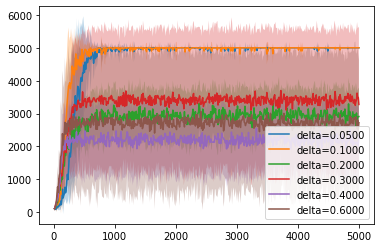

In [7]:
f = nu.compare(candidates_IS)

### MULTIPLE IS (capacity = 10), row-normalized

In [8]:
deltas = [0.05, 0.1, 0.2, 0.3, 0.4, 0.6]
files = {delta : glob.glob(path + '*env=RLLAB.CARTPOLE*norm=rows*cap=10_*delta=%.4f*' % delta) for delta in deltas}

In [9]:
candidates_MIS = {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}

delta=0.0500: 4652.836762 ± 124.225815	[4498.590041, 4807.083484]	 total horizon: 232693
delta=0.1000: 3841.913088 ± 1248.539757	[2291.646222, 5392.179954]	 total horizon: 192341
delta=0.2000: 4582.480595 ± 369.589338	[4318.092310, 4846.868881]	 total horizon: 229247
delta=0.3000: 3988.192222 ± 1762.023284	[1800.351346, 6176.033098]	 total horizon: 199545
delta=0.4000: 3044.871606 ± 1601.041527	[1899.555493, 4190.187719]	 total horizon: 152564
delta=0.6000: 3691.975173 ± 1516.980198	[1808.395476, 5575.554871]	 total horizon: 184832


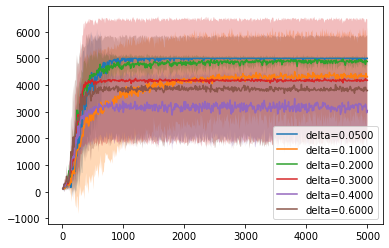

In [10]:
f = nu.compare(candidates_MIS)

### MULTIPLE IS (capacity = 10), all-normalized

In [14]:
deltas = [0.2, 0.4, 0.6, 0.8, 0.9]
files = {delta : glob.glob(path + '*env=RLLAB.CARTPOLE*norm=all*cap=10_*delta=%.4f*' % delta) for delta in deltas}

In [15]:
candidates_NORM = {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}

delta=0.2000: 2590.600694 ± 1999.099642	[108.390640, 5072.810748]	 total horizon: 129868
delta=0.4000: 2814.331887 ± 1845.838116	[522.421151, 5106.242622]	 total horizon: 141040
delta=0.6000: 2757.050138 ± 2039.736602	[224.382633, 5289.717643]	 total horizon: 138173
delta=0.8000: 2494.682338 ± 2159.117756	[-186.216448, 5175.581124]	 total horizon: 125057
delta=0.9000: 1054.168731 ± 628.806679	[273.402117, 1834.935346]	 total horizon: 53223


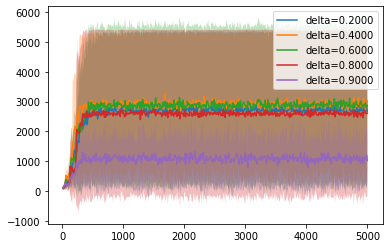

In [16]:
f = nu.compare(candidates_NORM)

### Compare Normalization

multi (delta = 0.05): 4652.836762 ± 124.225815	[4498.590041, 4807.083484]	 total horizon: 232693
multi (normalize all, delta = 0.4): 2814.331887 ± 1845.838116	[522.421151, 5106.242622]	 total horizon: 141040


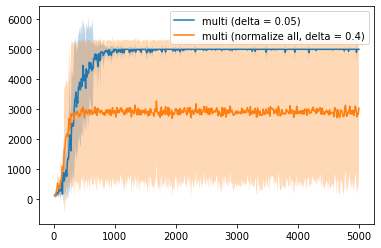

In [17]:
f = nu.compare({ 'multi (delta = 0.05)': candidates_MIS['delta=0.0500'],
                'multi (normalize all, delta = 0.4)': candidates_NORM['delta=0.4000']})

### MULTIPLE IS, Capacity = 5 (row-normalize)

In [182]:
deltas = [0.2, 0.4, 0.6, 0.8, 0.9]
files = {delta : glob.glob(path + '*env=RLLAB.CARTPOLE*norm=all*cap=5_*delta=%.4f*' % delta) for delta in deltas}

In [183]:
candidates_MIS5= {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}

delta=0.2000: 4287.914670 ± 1141.008878	[2871.165024, 5704.664315]	 total horizon: 214537
delta=0.4000: 1931.276332 ± 1846.541562	[-361.507846, 4224.060510]	 total horizon: 96986
delta=0.6000: 3379.675286 ± 2101.073028	[770.848551, 5988.502022]	 total horizon: 169203
delta=0.8000: 1841.387834 ± 1749.504457	[-330.908864, 4013.684532]	 total horizon: 92489
delta=0.9000: 2705.123033 ± 2072.053365	[132.328968, 5277.917099]	 total horizon: 135574


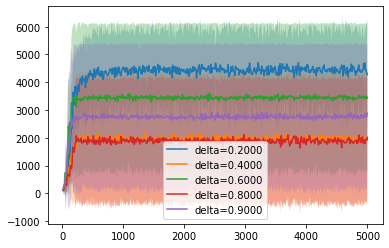

In [184]:
f = nu.compare(candidates_MIS5)

### MULTIPLE Capacity=10 vs Capacity=5

multi (capacity=10, delta = 0.2): 4582.480595 ± 392.008691	[4095.737516, 5069.223674]	 total horizon: 229247
multi (capacity=5, delta = 0.2): 4287.914670 ± 1141.008878	[2871.165024, 5704.664315]	 total horizon: 214537


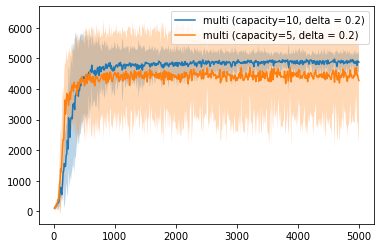

In [188]:
f = nu.compare({'multi (capacity=10, delta = 0.2)': candidates_MIS['delta=0.2000'],
                'multi (capacity=5, delta = 0.2)': candidates_MIS5['delta=0.2000']})

### SINGLE vs MULTI

single (delta = 0.1): 4783.427942 ± 68.553306	[4698.307770, 4868.548114]	 total horizon: 239215
multi (capacity=10, delta = 0.05): 4652.836762 ± 124.225815	[4498.590041, 4807.083484]	 total horizon: 232693


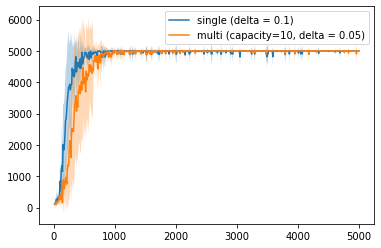

In [21]:
f = nu.compare({'single (delta = 0.1)' : candidates_IS['delta=0.1000'], 
                'multi (capacity=10, delta = 0.05)': candidates_MIS['delta=0.0500']})